In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_inf_line(ax: plt.Axes, pos: np.array, dir: np.array):
    slope = dir[1] / dir[0]
    intercept = pos[1] - slope * pos[0]
    x_values = np.linspace(-1, 10, 20)
    y_values = slope * x_values + intercept
    ax.plot(x_values, y_values, color='y', linestyle='--')

In [3]:
def plot_two_lines(pos1, dir1, pos2, dir2):

    fig, ax = plt.subplots()

    plot_inf_line(ax, pos1, dir1)
    plot_inf_line(ax, pos2, dir2)

    ax.quiver(*pos1, *dir1, color='b', angles='xy', scale_units='xy', scale=1)
    ax.quiver(*pos2, *dir2, color='r', angles='xy', scale_units='xy', scale=1)

    ax.plot(0, 0, color='orange', marker='o')

    # find the intersection, without linear algebra
    if np.cross(dir1, dir2) != 0:
        slope1 = dir1[1] / dir1[0]
        slope2 = dir2[1] / dir2[0]
        intercept1 = pos1[1] - slope1 * pos1[0]
        intercept2 = pos2[1] - slope2 * pos2[0]
        print(f"slope1, slope2, intercept1, intercept2: {slope1}, {slope2}, {intercept1}, {intercept2}")
        x = (intercept2 - intercept1) / (slope1 - slope2)
        y = slope1 * x + intercept1
        intersection = np.array([x, y])
        # parametric form
        t1 = (intersection[0] - pos1[0]) / dir1[0]
        t2 = (intersection[0] - pos2[0]) / dir2[0]
        print(f"t1, t2: {t1}, {t2}")
        if (t1 > 0 or t2 > 0):
            print("Intersection happened after the origin of the vectors")
            print(f"pca1: {pos1}, pca2: {pos2}, dist_pcas: {np.sqrt(np.sum((pos1 - pos2)**2))}")
            prev_point1 = pos1 + dir1 * 0.
            prev_point2 = pos2 + dir2 * -0.8
            print(f"pca1: {prev_point1}, pca2: {prev_point2}, dist_pcas: {np.sqrt(np.sum((prev_point1 - prev_point2)**2))}")
            # plot prev_point2 with a darker green
            ax.plot(prev_point2[0], prev_point2[1], color='g', marker='o')

        ax.plot(intersection[0], intersection[1], color='g', marker='o')
    else:
        print("Lines are parallel")

    # distance between two lines
    # https://math.stackexchange.com/questions/2213165/distance-between-two-lines-in-3d-space

    ax.set_xlim([-1, 10])
    ax.set_ylim([-1, 10])
    ax.set_xlabel('x', loc='right')
    ax.set_ylabel('y', loc='top')

    ax.grid(True)
    ax.set_aspect('equal')
    fig.set_size_inches(6, 6)

    plt.show()

In [4]:
def calculate_angle(dir1, dir2):
    norm_dir1 = np.sqrt(dir1[0]**2 + dir1[1]**2)
    norm_dir2 = np.sqrt(dir2[0]**2 + dir2[1]**2)
    angle_in_radians = np.arccos(np.dot(dir1, dir2) / (norm_dir1 * norm_dir2))
    print(np.degrees(angle_in_radians))

slope1, slope2, intercept1, intercept2: 1.0, -1.0, 0.0, 5.0
t1, t2: 1.5, -0.5
Intersection happened after the origin of the vectors
pca1: [1 1], pca2: [2 3], dist_pcas: 2.23606797749979
pca1: [1. 1.], pca2: [2.8 2.2], dist_pcas: 2.1633307652783933


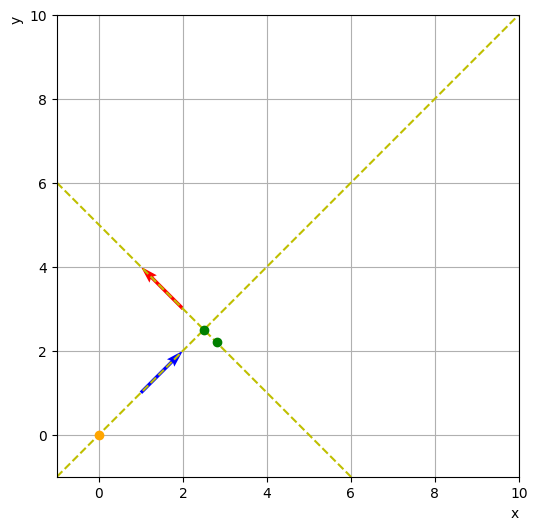

90.0


In [5]:
# Case (a): Two vectors pointing outwards the origin
pos1_a = np.array([1, 1])
dir1_a = np.array([1, 1])

pos2_a = np.array([2, 3])
dir2_a = np.array([-1, 1])

plot_two_lines(pos1_a, dir1_a, pos2_a, dir2_a)
calculate_angle(dir1_a, dir2_a)

Lines are parallel


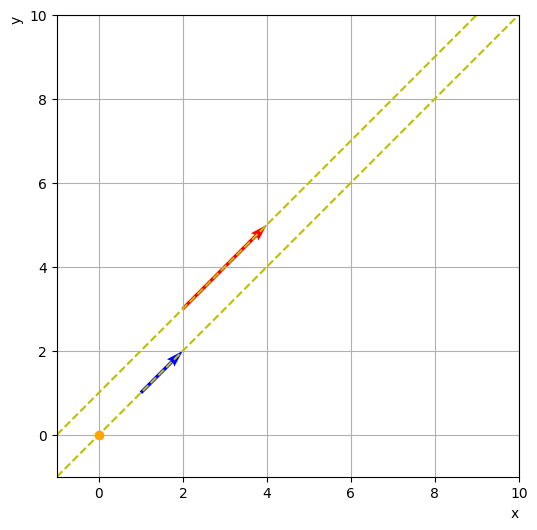

1.2074182697257333e-06


In [6]:
# Case (b): Two parallel vectors
pos1_b = np.array([1, 1])
dir1_b = np.array([1, 1])

pos2_b = np.array([2, 3])
dir2_b = np.array([2, 2])

plot_two_lines(pos1_b, dir1_b, pos2_b, dir2_b)
calculate_angle(dir1_b, dir2_b)

slope1, slope2, intercept1, intercept2: 1.0, 2.0, 0.0, -1.0
t1, t2: 0.0, -1.0


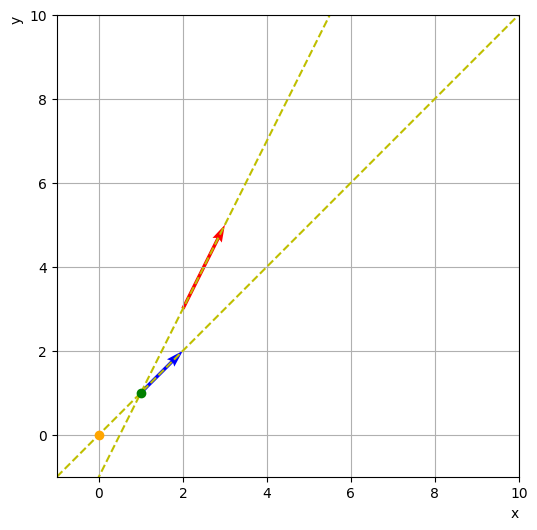

18.434948822922017


In [7]:
# Case (c): Two vectors intersect before their original positions
pos1_c = np.array([1, 1])
dir1_c = np.array([1, 1])

pos2_c = np.array([2, 3])
dir2_c = np.array([1, 2])

plot_two_lines(pos1_c, dir1_c, pos2_c, dir2_c)
calculate_angle(dir1_c, dir2_c)

slope1, slope2, intercept1, intercept2: 1.0, 0.5, 0.0, 2.0
t1, t2: 3.0, 1.0
Intersection happened after the origin of the vectors
pca1: [1 1], pca2: [2 3], dist_pcas: 2.23606797749979
pca1: [1. 1.], pca2: [0.4 2.2], dist_pcas: 1.341640786499874


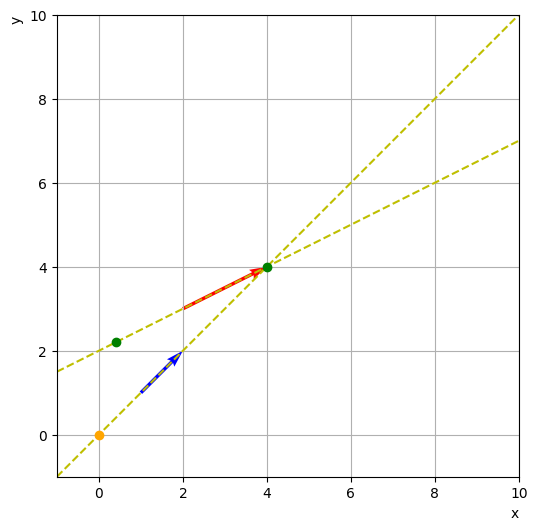

18.434948822922017


In [8]:
# Case (d): Two vectors intersect after their original positions
pos1_d = np.array([1, 1])
dir1_d = np.array([1, 1])

pos2_d = np.array([2, 3])
dir2_d = np.array([2, 1])

plot_two_lines(pos1_d, dir1_d, pos2_d, dir2_d)
calculate_angle(dir1_d, dir2_d)

In [10]:
from scipy.optimize import minimize

# Define the function to be minimized
def objective_function(x):
    return x[0]**2 + x[1]**2

# Define the constraint: x[0] + x[1] = 1
def constraint_function(x):
    return x[0] + x[1] - 1

constraint = {'type': 'eq', 'fun': constraint_function}

# Initial guess
x0 = [0, 0]

# Call the minimize function
result = minimize(objective_function, x0, constraints=constraint)

print(result.x)

[0.5 0.5]


In [11]:
def objective_function(t):
    return (2 * t[1] + 2 - (1 * t[0] + 1))**2 + (1 * t[1] + 3 - (1 * t[0] + 1))**2

# Define the constraints: t[0] < 0 and t[1] < 0
def constraint1(t):
    return -t[0]

def constraint2(t):
    return -t[1]

# Initial guess
t0 = [0, 0]

constraints = [{'type': 'ineq', 'fun': constraint1},
               {'type': 'ineq', 'fun': constraint2}]

# Call the minimize function
result = minimize(objective_function, t0, constraints=constraints)

print(result.x)

print(f"dist = {np.sqrt(objective_function(result.x))}")

[-8.88178420e-15 -8.00000006e-01]
dist = 1.341640786499878
